<a href="https://colab.research.google.com/github/anshikapanwar0/Analyzing-Amazon-Sales-data/blob/main/amazonsalesanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data=pd.read_csv("/content/Amazon Sales data.csv")

data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [2]:
data.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,2/10/2012,665095412,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91


In [3]:
#Handling inconsistent values
data.dropna(inplace=True)
data['Region']= data['Region'].str.title();
data['Country']= data['Country'].str.title();
data['Item Type']= data['Item Type'].str.title();
data['Sales Channel']= data['Sales Channel'].str.capitalize();

data['Order Date']=pd.to_datetime(data['Order Date'])
data['Ship Date']=pd.to_datetime(data['Ship Date'])


data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia And Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America And The Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome And Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
#handling outliers
def outliers(data, column):
  Q1=data[column].quantile(0.25)
  Q3=data[column].quantile(0.75)
  IQR=Q3-Q1
  Lower_limit=Q1-1.5*IQR
  Upper_limit=Q3+1.5*IQR

  data[column]=data[column].apply(lambda x: Upper_limit if x>Upper_limit else Lower_limit if x<Lower_limit else x)

numerical_columns=("Units Sold","Unit Price","Unit Cost","Total Revenue","Total Cost","Total Profit")

for column in numerical_columns:
  outliers(data,column)


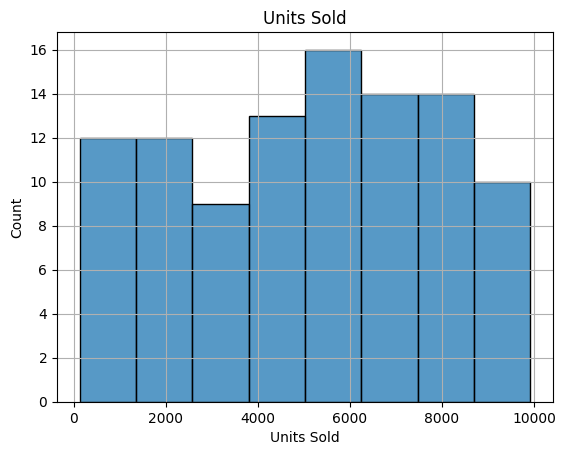

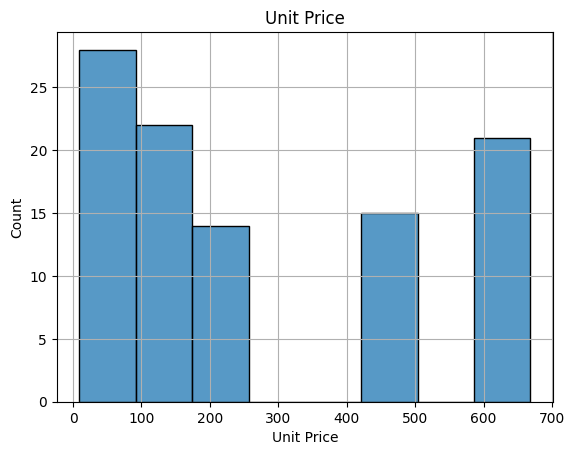

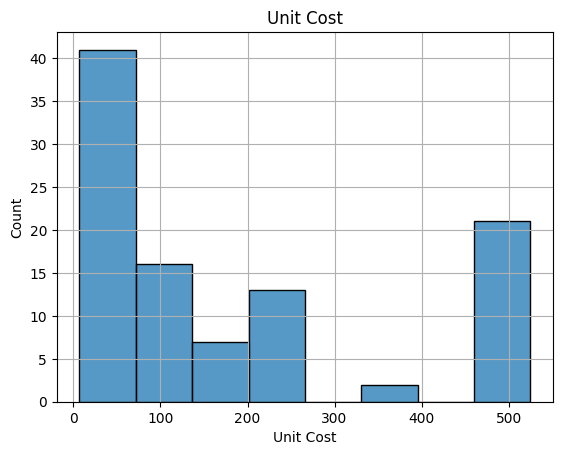

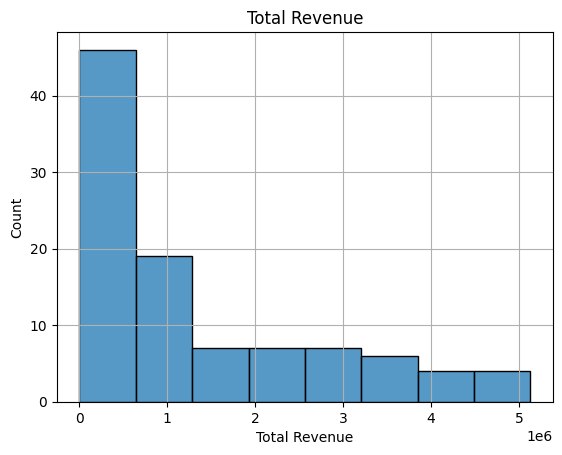

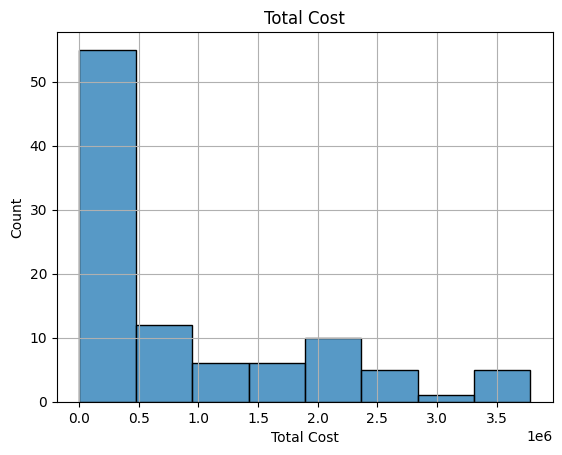

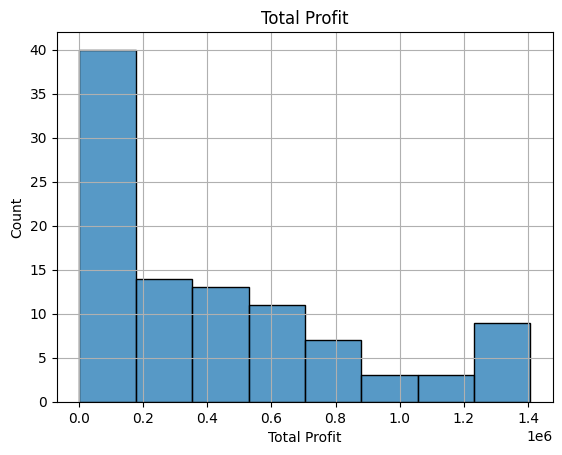

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns=("Units Sold","Unit Price","Unit Cost","Total Revenue","Total Cost","Total Profit")

for column in numerical_columns:
  sns.histplot(data[column])
  plt.grid(True)
  plt.title(column)
  print()
  plt.show()


In [6]:
pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


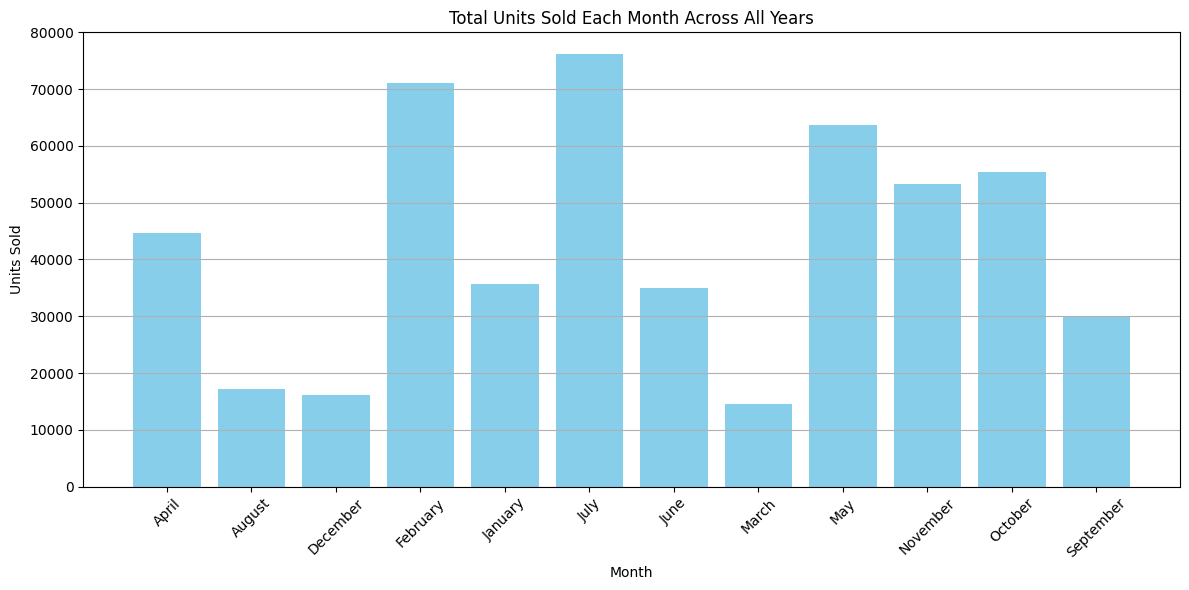

In [16]:
# month wise analysis
data['Month'] = data['Order Date'].dt.month
monthly_units_sold = data.groupby('Month')['Units Sold'].sum().reset_index()
monthly_units_sold['Month'] = monthly_units_sold['Month'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})
monthly_units_sold = monthly_units_sold.sort_values('Month')
plt.figure(figsize=(12, 6))
plt.bar(monthly_units_sold['Month'], monthly_units_sold['Units Sold'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.title('Total Units Sold Each Month Across All Years')
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


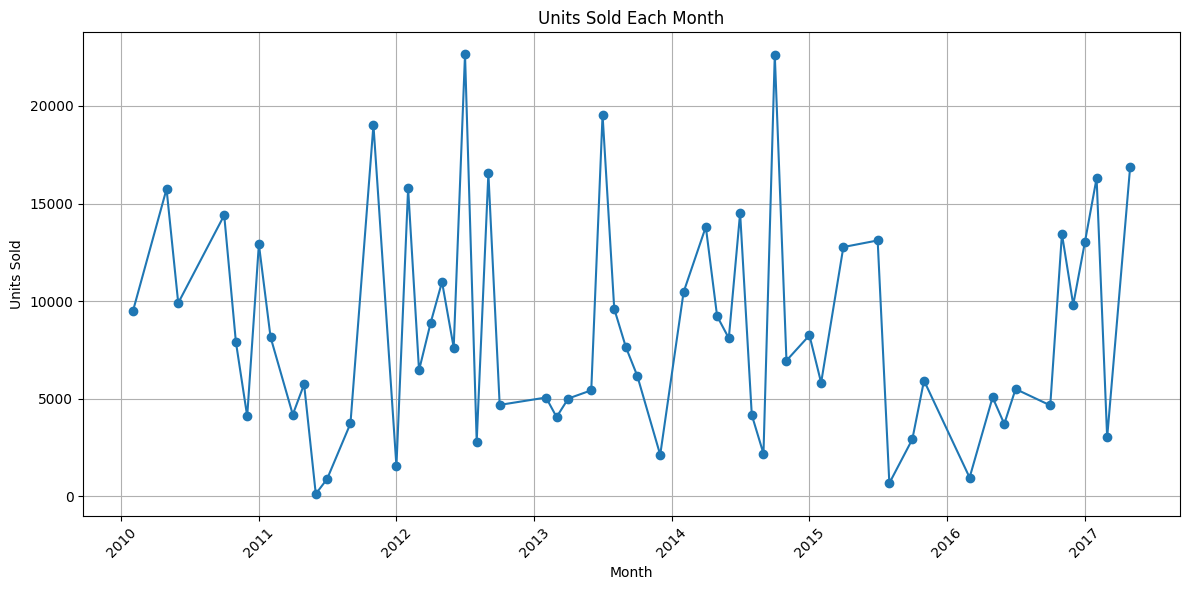

In [15]:
# yearly_month-wise analysis
data['Year-Month'] = data['Order Date'].dt.to_period('M')
monthly_units_sold = data.groupby('Year-Month')['Units Sold'].sum().reset_index()
monthly_units_sold['Year-Month'] = monthly_units_sold['Year-Month'].dt.to_timestamp()
plt.figure(figsize=(12, 6))
plt.plot(monthly_units_sold['Year-Month'], monthly_units_sold['Units Sold'], marker='o')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.title('Units Sold Each Month')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

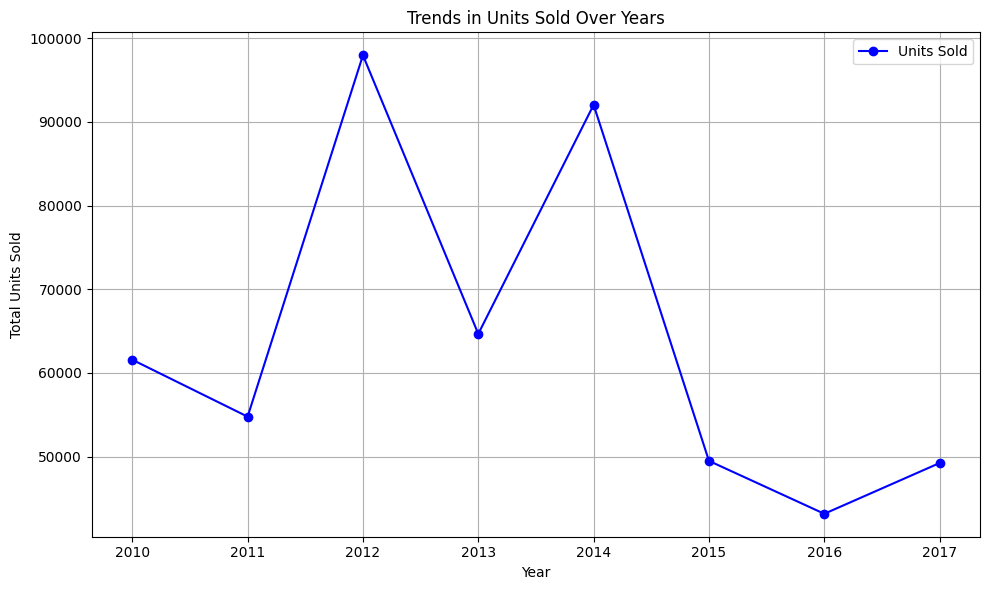

In [7]:
# year-wise analysis
data['Year'] = data['Order Date'].dt.year
yearly_totals = data.groupby('Year')['Units Sold'].sum()

plt.figure(figsize=(10, 6))
plt.plot(yearly_totals.index, yearly_totals.values, marker='o', linestyle='-', color='b', label='Units Sold')
plt.xlabel('Year')
plt.ylabel('Total Units Sold')
plt.title('Trends in Units Sold Over Years')
plt.xticks(yearly_totals.index)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

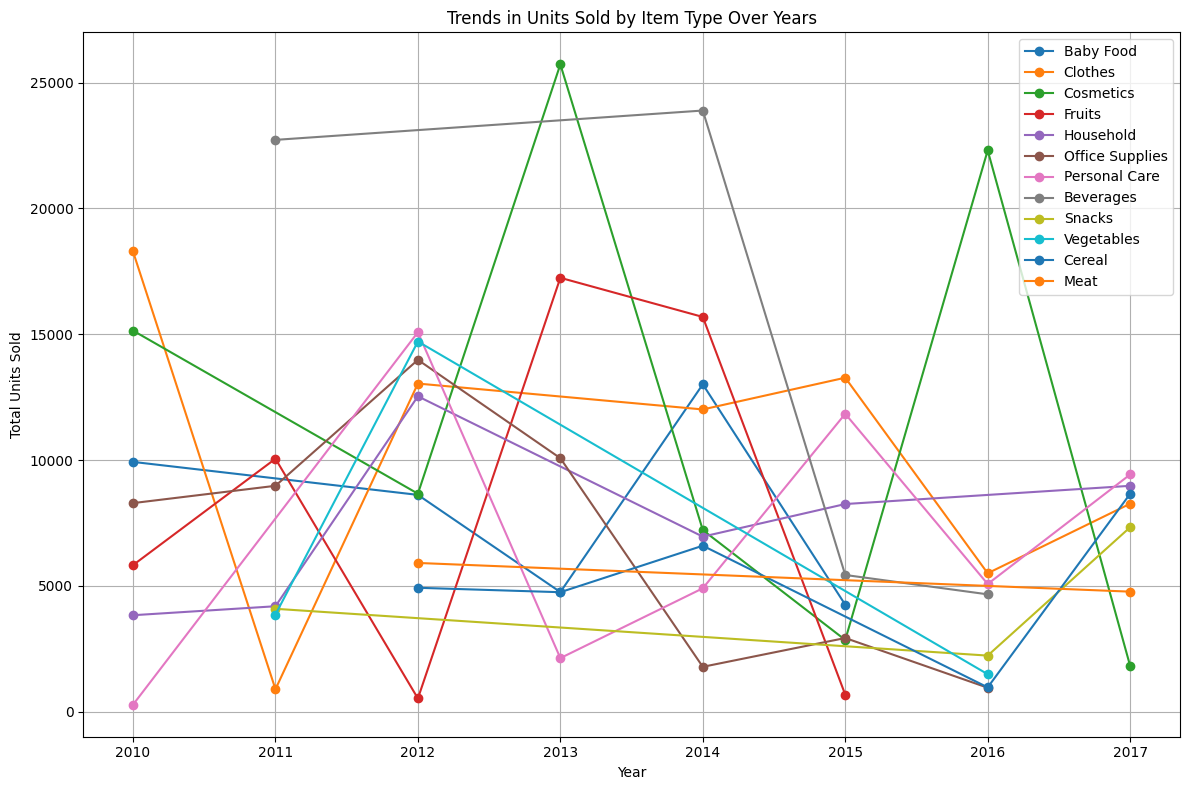

In [8]:
# each item sold per year
data['Year'] = data['Order Date'].dt.year
yearly_item_totals = data.groupby(['Year', 'Item Type'])['Units Sold'].sum().reset_index()
unique_items = yearly_item_totals['Item Type'].unique()

plt.figure(figsize=(12, 8))

for item in unique_items:
    item_data = yearly_item_totals[yearly_item_totals['Item Type'] == item]
    plt.plot(item_data['Year'], item_data['Units Sold'], marker='o', linestyle='-', label=item)

plt.xlabel('Year')
plt.ylabel('Total Units Sold')
plt.title('Trends in Units Sold by Item Type Over Years')
plt.xticks(yearly_item_totals['Year'].unique())
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
data['Year'] = data['Order Date'].dt.year
yearly_item_totals = data.groupby(['Year', 'Item Type'])['Units Sold'].sum().reset_index()
highest_sold_items = yearly_item_totals.loc[yearly_item_totals.groupby('Year')['Units Sold'].idxmax()]
print(highest_sold_items)

    Year      Item Type  Units Sold
1   2010        Clothes       18290
7   2011      Beverages       22726
22  2012  Personal Care       15078
26  2013      Cosmetics       25728
31  2014      Beverages       23892
41  2015        Clothes       13272
50  2016      Cosmetics       22308
60  2017  Personal Care        9424


In [10]:
# overall most sold items
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
transactions = data['Item Type'].tolist()
encoded_df = pd.get_dummies(pd.DataFrame(transactions), prefix='', prefix_sep='').groupby(level=0, axis=1).max()
frequent_itemsets = apriori(encoded_df, min_support=0.1, use_colnames=True)
print(frequent_itemsets)

   support           itemsets
0     0.13          (Clothes)
1     0.13        (Cosmetics)
2     0.10           (Fruits)
3     0.12  (Office Supplies)
4     0.10    (Personal Care)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


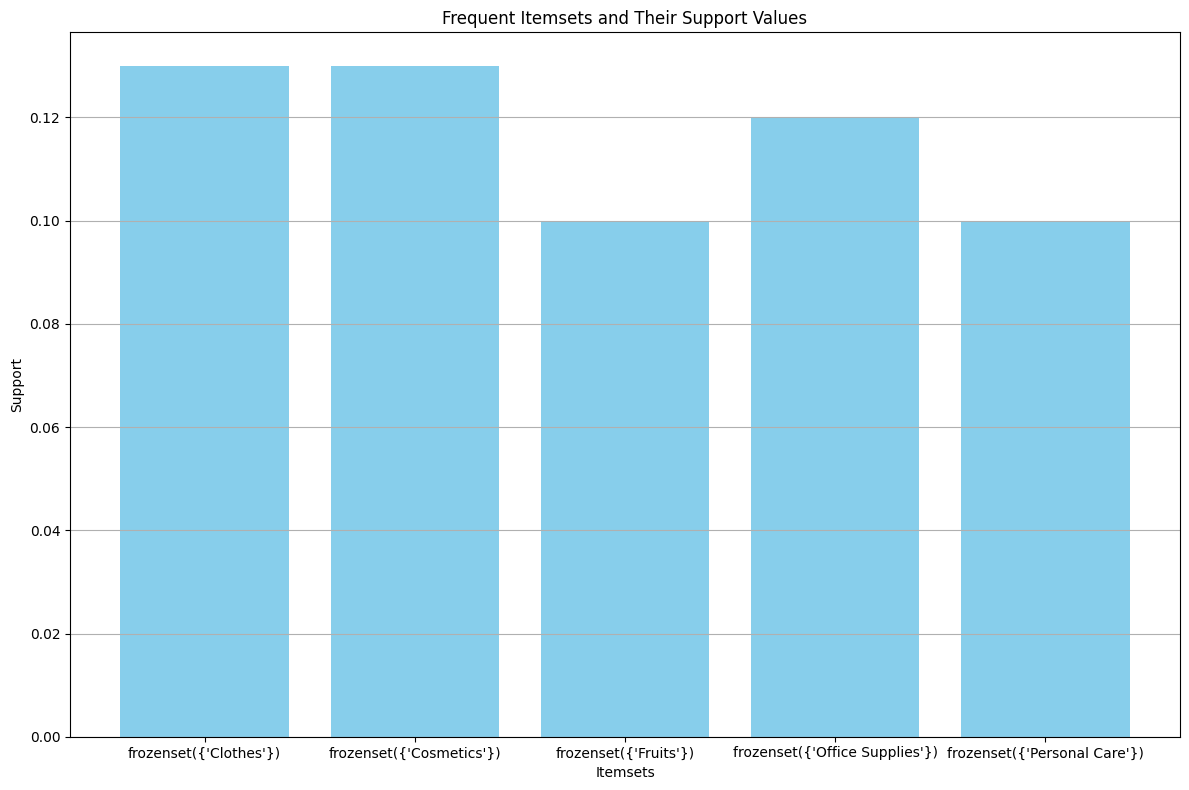

In [11]:
plt.figure(figsize=(12, 8))
plt.bar(frequent_itemsets['itemsets'].astype(str), frequent_itemsets['support'], color='skyblue')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Frequent Itemsets and Their Support Values')
plt.xticks(rotation=360)
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


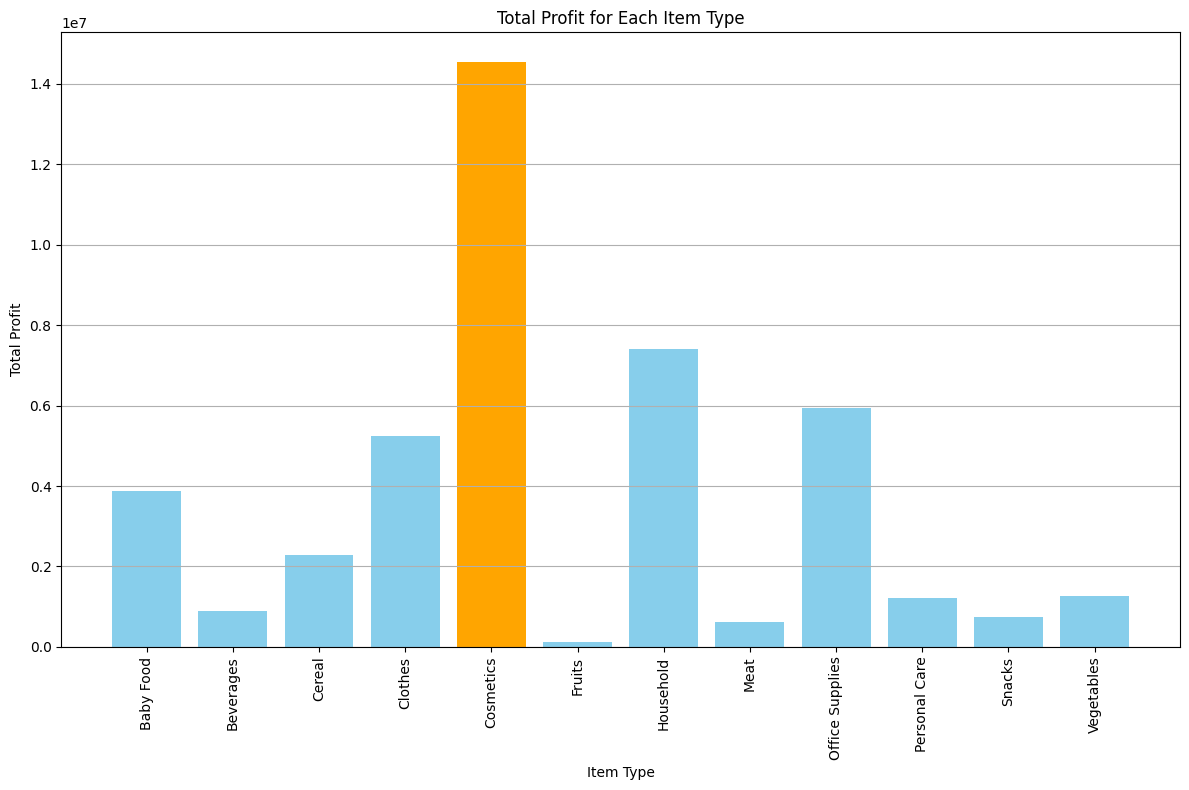

Most profitable item:
Item Type         Cosmetics
Total Profit    14556048.66
Name: 4, dtype: object


In [12]:
# most profitable item
data['Total Revenue'] = data['Units Sold'] * data['Unit Price']
data['Total Cost'] = data['Units Sold'] * data['Unit Cost']
data['Total Profit'] = data['Total Revenue'] - data['Total Cost']
item_profit = data.groupby('Item Type')['Total Profit'].sum().reset_index()
most_profitable_item = item_profit.loc[item_profit['Total Profit'].idxmax()]
plt.figure(figsize=(12, 8))
plt.bar(item_profit['Item Type'], item_profit['Total Profit'], color='skyblue')
plt.bar(most_profitable_item['Item Type'], most_profitable_item['Total Profit'], color='orange')
plt.xlabel('Item Type')
plt.ylabel('Total Profit')
plt.title('Total Profit for Each Item Type')
plt.xticks(rotation=90)
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

print("Most profitable item:")
print(most_profitable_item)